In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/uyc201/stats131finalproject/master/Chapter2OnlineData.csv'
happy = pd.read_csv(url)

col_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18]

happy_clean = happy.iloc[:,col_range]
happy_clean.iloc[:,1:] = happy_clean.iloc[:,1:].apply(pd.to_numeric)
happy_fin = happy_clean.set_index('Country name')

happy_2017 = happy_fin.loc[happy_fin.Year == 2017,:]
happy_2017_clean = pd.read_csv('happy_2017_clean.csv')
happy_2017_final = pd.read_csv('happy_2017_final.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Cleaning our data

Because the majority of our data analysis was on the data from countries in 2017, we data-cleaned the countries' 2017 data. A simple line of code yielded 19 countries that had missing data. From there, we determined how to handle the missing data on case-by-case basis. 

In [2]:
happy_2017[happy_2017.isnull().any(axis = 1)]

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
Country name,,,,,,,,,,,,,,,,
Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,NaN,-0.927691,-0.816839,2.039765,0.388607,0.527556
Bahrain,2017,6.227321,10.675694,0.875747,68.500000,0.905859,0.128193,NaN,0.813571,0.289760,NaN,-1.167434,0.226644,2.215526,0.355775,0.446609
China,2017,5.099061,9.636177,0.772033,69.000000,0.877618,-0.191225,NaN,0.821097,0.214005,NaN,-0.877810,-0.064555,2.271664,0.445506,0.633355
Egypt,2017,3.929344,9.263901,0.638226,61.400002,0.592505,-0.159880,NaN,0.539323,0.414494,NaN,-1.332293,-0.639170,2.289861,0.582759,0.380815
Iran,2017,4.716783,9.856533,0.714233,65.699997,0.730635,0.186622,0.714941,0.693666,0.438534,NaN,-1.114465,-0.720983,2.497179,0.529424,0.852040
Jordan,2017,4.808083,9.028518,0.814665,66.599998,0.766262,-0.150126,NaN,0.627798,0.391505,NaN,-0.625527,0.183539,2.523892,0.524927,0.363606
Kuwait,2017,6.093905,11.090272,0.853491,66.500000,0.884182,-0.039014,NaN,0.692072,0.307321,NaN,-0.323727,-0.114578,2.355753,0.386575,0.591861
Libya,2017,5.646852,9.791522,0.822759,62.299999,0.778696,-0.053039,0.673066,0.697049,0.379374,NaN,-1.884453,-1.840400,2.507788,0.444104,0.586069
Mauritania,2017,4.678160,8.188031,0.779225,56.700001,0.527447,-0.135666,0.777314,0.637107,0.272322,0.292110,-0.709611,-0.711580,2.130550,0.455425,NaN


Some missing data, like ones in "Log GDP per capita", could be searched up on the internet, although sometimes difficult, and we filled in the missing data. Some missing data, like ones in "Healthy life expectancy", could not be easily searched up on the internet, as the definition of "healthy" life expectancy differs from "regular" life expectancy. For these missing data, we decided to remove the country's observation altogether, as we were unable to accurately fill them in. 

In [3]:
# observation that was kept
happy_2017[happy_2017.index == 'South Sudan']

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
Country name,,,,,,,,,,,,,,,,
South Sudan,2017,2.816622,NaN,0.556823,51.0,0.456011,NaN,0.76127,0.585602,0.517364,0.461551,-2.138769,-2.018497,2.736838,0.971674,0.703008


In [4]:
# observation that was removed
happy_2017[happy_2017.index == 'Taiwan Province of China']

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"gini of household income reported in Gallup, by wp5-year"
Country name,,,,,,,,,,,,,,,,
Taiwan Province of China,2017,6.359451,NaN,0.891119,NaN,0.759655,NaN,0.74278,0.837277,0.114123,0.322822,0.951503,1.18533,1.869602,0.293988,0.381672


Many of the countries with missing 2017 data had complete, available data from previous years. If there were at least 3-5 previous years' data on those variables, we plotted those points and used our best judgement to predict the same value in 2017. If the plot showed a clear linear relationship, we would use a linear regression model to predict the missing data in 2017. If the plot showed a clear polynomial relationship, we would use the appropriate regression model to predict the missing data in 2017. If there was no clear relationship, we would then take the average of the previous years to fill in the missing data in 2017.



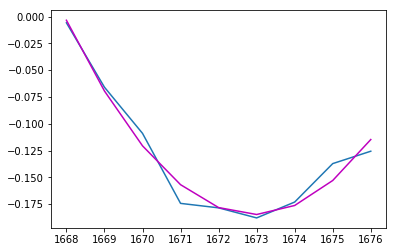

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Yemen's 'Generosity' scores over time showed quadratic features
happy_clean[happy_clean['Country name'] == 'Yemen'].Generosity.plot()
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(happy_clean[happy_clean['Country name'] == 'Yemen'].Generosity.dropna().index.values.reshape(-1, 1))
model = LinearRegression()
model.fit(x_poly,happy_clean[happy_clean['Country name'] == 'Yemen'].Generosity.dropna())
y_poly_pred = model.predict(x_poly)
plt.plot(happy_clean[happy_clean['Country name'] == 'Yemen'].Generosity.dropna().index.values.reshape(-1, 1), y_poly_pred, color='m')
plt.show()

Of the 19 countries, we could see that 9 of them had both "Perceptions of corruption" and "Confidence in national government" data missing, which was an interesting observation as the definition of these variables could have some overlapping similarities. A plot of "Perceptions of corruption" and "Confidence in national government" from the available data from 2017 showed a clear negative relationship between the two variables, meaning that citizens who had low confidence in their national government would feel that there was more corruption. We looked to see if previous years' data was available for us to use and possibly form a model on, but we found that it was common for those countries like China and Kuwait to have those variables' data all missing. This was another interesting find, as citizens interviewed may have not felt comfortable in revealing this kind of information. Since 9 countries had these two columns' data missing, we felt that it was necessary to fill in the data, and we used 2 OLS models, one to predict "Perceptions of corruption" and "Confidence in national government." To build the model, we plotted all predictors against "Confidence in national government" (and then doing the same against "Perceptions of corruption") to see if there was any linear relationship. We found that the combination "Freedom to make life choices" and "Generosity" variables had a statistically significant relationship with "Confidence in national government" (p-values of coefficients were less than the accepted 0.05) and used this model to predict missing "Confidence in national government" data in 2017. We also found that the combination of "Generosity", "Democratic Quality", and "Delievery Quality" had a statistically significant relationship with "Perceptions of corruption" and used this model to predict missing "Perceptions of corruption" data in 2017.



In [6]:
# model to predict missing "Confidence in national governmnent" data in 2017
import statsmodels.formula.api as smf
df = happy_2017.dropna()
model = smf.ols('Q("Confidence in national government") ~ Q("Freedom to make life choices") + Q("Generosity")', data = df)
results = model.fit()
print(results.summary())

                                      OLS Regression Results                                      
Dep. Variable:     Q("Confidence in national government")   R-squared:                       0.267
Model:                                                OLS   Adj. R-squared:                  0.255
Method:                                     Least Squares   F-statistic:                     22.77
Date:                                    Tue, 03 Dec 2019   Prob (F-statistic):           3.69e-09
Time:                                            12:34:57   Log-Likelihood:                 41.116
No. Observations:                                     128   AIC:                            -76.23
Df Residuals:                                         125   BIC:                            -67.68
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

In [7]:
# model to predict missing "Perceptions of corruption" data in 2017
import statsmodels.formula.api as smf
df = happy_2017.dropna()
model2 = smf.ols('Q("Perceptions of corruption") ~ Q("Generosity") + Q("Democratic Quality") + Q("Delivery Quality")', data = df)
results2 = model2.fit()
print(results2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Q("Perceptions of corruption")   R-squared:                       0.492
Model:                                        OLS   Adj. R-squared:                  0.480
Method:                             Least Squares   F-statistic:                     40.02
Date:                            Tue, 03 Dec 2019   Prob (F-statistic):           3.70e-18
Time:                                    12:34:58   Log-Likelihood:                 75.235
No. Observations:                             128   AIC:                            -142.5
Df Residuals:                                 124   BIC:                            -131.1
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975

From here, we inputted the predicted missing data back into the appropriate cells and dropped appropriate observations. While cleaning the data, we noticed variables that we did not have sufficient explanations of what they were (Standard deviation/mean of ladder by country-year and gini of household income) and removed the columns. Lastly, we added a new column to the dataset, Region, denoting which region the country was geographically located. We added this region from a different dataset that had this information, and merged that dataframe with our clean dataframe. Some countries did not have a region, and we filled in this information by searching on the internet where the countries were located. 

In [8]:
happy_2017_final.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Region
0,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808,1.454051,ASIA (EX. NEAR EAST)
1,Albania,2017,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,0.299945,-0.130315,2.682105,EASTERN EUROPE
2,Algeria,2017,5.248912,9.540639,0.806754,65.699997,0.436670,-0.191522,0.699774,0.641980,0.288710,0.324916,-0.927691,-0.816839,2.039765,NORTHERN AFRICA
3,Argentina,2017,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430,0.351304,-0.158056,2.409329,LATIN AMER. & CARIB
4,Armenia,2017,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,-0.633139,-0.132939,2.325379,C.W. OF IND. STATES


## Exploratory Analysis: Regions

__The plot below shows the relationship between "life ladder" scores and "social support" scores color-coordinated by regions.__

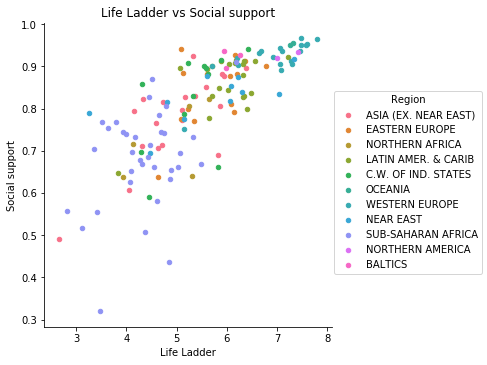

In [9]:
sns.lmplot(x='Life Ladder',y='Social support', hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Social support')
plt.show()

Holistically, the plot shows a positive, linear relationship with these two scores, meaning that happier countries tend to also have their citizens being able to help one another in times of need. Countries in Sub-Saharan Africa are clearly in bottom left of the graph, indicating low "life ladder" and "social support" scores. It is also clear that countries in regions Near East and Western Europe have the highest "life ladder and "social support" scores.

__The plot below shows the relationship between "life ladder" scores and "Healthy life expectnacy at birth" scores color-coordinated by regions.__

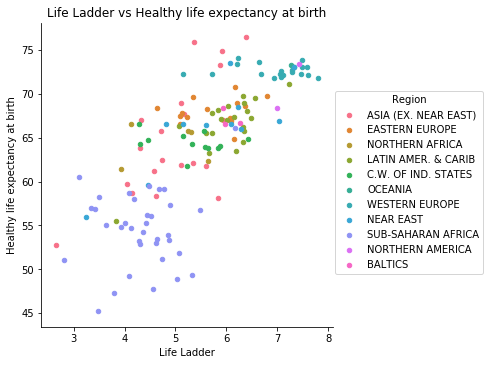

In [10]:
sns.lmplot(x='Life Ladder',y='Healthy life expectancy at birth',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Healthy life expectancy at birth')
plt.show()

Holistically, the plot shows a positive relationship between the two variables, meaning that happier countries tend to also have people with higher healthy life expectancy at birth. Countries in Sub-Saharan Africa are clearly in bottom left of the graph, also indicating that people in these countries experience the lowest healthy life expectancy when born. It is also clear that countries in regions Near East and Western Europe also have the highest healthy life expectacny at birth, as well.

__The plot below shows the relationship between "life ladder" scores and "Log GDP per capita" scores color-coordinated by regions.__

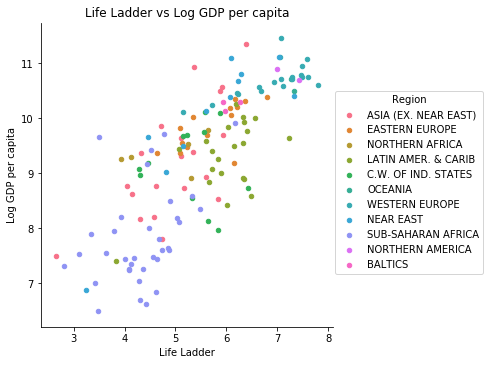

In [11]:
sns.lmplot(x='Life Ladder',y='Log GDP per capita',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Log GDP per capita')
plt.show()

Holistically, the plot shows a positive, although weak perhaps, relationship between the two variables. Countries in Sub-Saharan Africa are once again clearly in bottom left of the graph, indicating that these countries have the weakest productive capacity and lowest wealth compared to other countries. Countries in Western Europe and Near East also have the highest productive capacity and wealth. Interestingly, countries in Asia, excluding the Near East region, show a wide range in happiness scores and Log GDP per capita.

__The plot below shows the relationship between "life ladder" scores and "freedom to make life choices" scores color-coordinated by regions.__

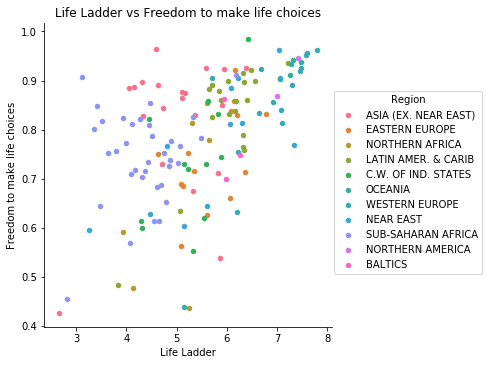

In [12]:
sns.lmplot(x='Life Ladder',y='Freedom to make life choices',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Life Ladder vs Freedom to make life choices')
plt.show()

Holistically, the plot shows that their is a weak, but positive, relationship between the two variables, meaning that people in happier countries may generally be very satisfied with their freedom to make their own choices. Countries in Sub-Saharan Africa are again in the bottom left of the graph, indicating that people in these countries are the least satisfied with their freedom to make decisions in their life. Countries in Western Europe and Near East also have show the highest scores in this area.

__The plot below shows the relationship between "perceptions of corruption" scores and "confidence in national government" scores color-coordinated by regions.__

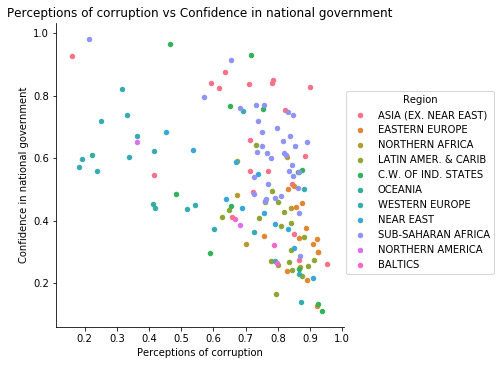

In [13]:
sns.lmplot(x='Perceptions of corruption',y='Confidence in national government',hue='Region',data=happy_2017_final,fit_reg=False,scatter_kws={'alpha':1,'s':20})
plt.title('Perceptions of corruption vs Confidence in national government')
plt.show()

The plot shows a negative relationship, with a "fan-ing in" behavior, between the two variables. This should come as no surprise, as it makes sense that people who perceive corruption throughout their government would have lower confidence in them. Interestingly, there are few countries that have low scores in "perceptions of corruption" and high scores "confidence in national government". Here, we can see that Latin American and Eastern European countries show high scores in "perceptions of corruption" and  low scores in "confidence in national government. It is also interestingly to notice that most Sub-Saharan African countries have high scores in "perceptions of corruption" but vary relatively widely in "confidence in national government" scores.